# **1. Segment stocks on the basis of Closing Price**

In [34]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [35]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    
  
# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import metrics

import pandas as pd
from sklearn.decomposition import PCA

In [36]:
!pip install yfinance

In [37]:
import yfinance as yf

In [38]:
stocks = ['TCS.NS','RELIANCE.NS','TITAN.NS','BANKINDIA.NS','BANKINDIA.BO','TCS.BO','PNB.BO','PNB.NS','HDFCBANK.NS','HDFCBANK.BO','ICICIBANK.NS','ICICIBANK.BO','PEL.NS','CIPLA.NS','CADILAHC.NS','DRREDDY.NS','SBIN.NS']
mydata = yf.download('TCS.NS', start = '2019-01-01',end = '2020-01-01')
mydata.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2019-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       242 non-null    float64
 1   High       242 non-null    float64
 2   Low        242 non-null    float64
 3   Close      242 non-null    float64
 4   Adj Close  242 non-null    float64
 5   Volume     242 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.2 KB


In [39]:
mydata = mydata.append(yf.download('RELIANCE.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('TITAN.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('BANKINDIA.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('BANKINDIA.BO',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('TCS.BO',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('PNB.BO',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('PNB.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('HDFCBANK.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('HDFCBANK.BO',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('ICICIBANK.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('ICICIBANK.BO',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('PEL.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('CIPLA.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('CADILAHC.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('DRREDDY.NS',start = '2019-01-01', end = '2020-01-01'))
mydata = mydata.append(yf.download('SBIN.NS',start = '2019-01-01', end = '2020-01-01'))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [40]:
mydata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,1896.000000,1910.000000,1885.000000,1902.800049,1815.441162,1094883
2019-01-02,1905.000000,1934.449951,1900.000000,1923.300049,1835.000000,2100463
2019-01-03,1919.000000,1944.949951,1893.099976,1899.949951,1812.721924,2611668
2019-01-04,1900.000000,1901.199951,1841.000000,1876.849976,1790.682617,4280862
2019-01-07,1891.800049,1908.800049,1881.000000,1897.900024,1810.766113,1856423


In [41]:
data_df = pd.DataFrame()
data_close =np.array(mydata.loc[:,'Close'])
for i in range(0,242):
    li = []
    for k in range(0,17):
        li.append(data_close[k*242 + i])
    data_df[str(i)] = li

In [42]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241
0,1902.800049,1923.300049,1899.949951,1876.849976,1897.900024,1893.550049,1886.949951,1888.550049,1842.550049,1813.250000,1867.800049,1870.150024,1894.300049,1900.650024,1908.699951,1901.900024,1875.599976,1901.550049,1920.800049,1955.000000,1982.750000,1981.400024,2014.099976,2029.949951,2050.250000,2044.550049,2074.800049,2082.899902,2061.399902,2065.899902,2051.600098,2044.599976,2029.699951,1970.300049,1904.800049,1914.750000,1914.199951,1925.650024,1985.150024,2038.699951,...,2193.949951,2201.850098,2188.500000,2185.350098,2129.949951,2100.949951,2178.600098,2196.800049,2174.449951,2152.600098,2108.800049,2108.550049,2118.100098,2071.699951,2081.500000,2046.650024,2054.300049,2077.350098,2053.250000,2021.050049,2051.000000,2078.500000,2121.300049,2123.600098,2060.449951,2012.849976,2041.900024,2020.900024,2071.250000,2126.750000,2164.949951,2167.750000,2229.050049,2222.899902,2231.699951,2215.600098,2201.949951,2198.500000,2183.199951,2161.699951
1,1121.000000,1106.400024,1092.750000,1098.650024,1104.750000,1104.650024,1110.750000,1107.500000,1098.050049,1096.800049,1129.650024,1135.900024,1134.449951,1184.349976,1237.699951,1235.150024,1226.300049,1247.449951,1246.000000,1229.550049,1210.650024,1195.699951,1227.150024,1249.949951,1290.900024,1291.550049,1310.250000,1290.400024,1277.699951,1253.250000,1256.400024,1224.199951,1244.449951,1220.099976,1216.099976,1234.349976,1246.900024,1232.349976,1232.300049,1220.250000,...,1457.650024,1447.300049,1434.900024,1458.599976,1445.500000,1427.800049,1472.300049,1462.750000,1470.849976,1459.199951,1509.750000,1547.650024,1537.599976,1546.500000,1561.550049,1560.250000,1569.849976,1580.300049,1551.150024,1586.500000,1578.900024,1552.699951,1550.849976,1554.900024,1572.599976,1561.949951,1562.400024,1568.199951,1582.900024,1566.599976,1562.699951,1575.849976,1609.949951,1599.099976,1571.400024,1546.449951,1515.400024,1542.349976,1544.199951,1514.050049
2,928.000000,932.150024,931.200012,928.450012,944.049988,946.150024,952.950012,966.700012,959.299988,957.500000,968.299988,961.200012,961.549988,960.950012,962.750000,982.650024,962.150024,969.650024,978.000000,958.650024,966.099976,968.900024,995.799988,991.549988,1025.750000,1066.699951,1059.050049,1056.800049,1053.250000,1056.400024,1066.250000,1042.250000,1039.000000,1027.349976,1028.800049,1032.750000,1042.500000,1041.599976,1043.000000,1038.349976,...,1298.800049,1283.800049,1156.099976,1167.199951,1156.750000,1155.699951,1159.050049,1169.099976,1158.449951,1158.800049,1163.199951,1162.849976,1148.250000,1135.599976,1163.599976,1166.099976,1167.150024,1169.500000,1159.699951,1153.800049,1158.150024,1174.650024,1184.250000,1172.000000,1178.050049,1179.300049,1179.550049,1188.000000,1186.150024,1165.650024,1157.349976,1159.099976,1159.050049,1201.900024,1209.099976,1204.099976,1192.500000,1191.449951,1193.750000,1187.949951
3,106.349998,104.800003,105.750000,108.699997,106.400002,108.800003,105.449997,106.099998,103.250000,104.000000,104.099998,105.300003,104.349998,102.650002,100.650002,97.849998,97.099998,97.300003,94.449997,90.599998,98.150002,99.150002,102.800003,94.849998,93.250000,90.949997,91.900002,92.050003,86.550003,84.699997,82.949997,82.800003,80.199997,78.650002,81.099998,81.849998,83.250000,83.000000,82.900002,81.150002,...,71.349998,70.400002,69.949997,68.750000,66.449997,67.150002,65.500000,66.250000,69.349998,71.300003,74.099998,73.599998,73.150002,73.050003,74.599998,74.550003,76.849998,77.400002,75.900002,74.900002,71.400002,72.199997,70.949997,68.400002,68.300003,67.050003,68.050003,68.800003,70.900002,71.050003,71.250000,71.349998,71.449997,69.900002,69.599998,69.150002,70.949997,71.800003,69.750000,70.400002
4,106.349998,104.750000,105.7

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

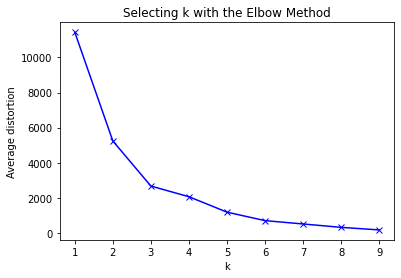

In [43]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(data_df)
  prediction=model.predict(data_df)
  meanDistortions.append(sum(np.min(cdist(data_df, model.cluster_centers_, 'euclidean'), axis=1)) / data_df.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

From Elbow curve we choose k = 5

In [44]:
pd.DataFrame(model.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241
0,93.062500,91.312500,91.787500,95.012501,93.437502,95.212500,93.087498,93.662498,91.924999,93.087502,93.012499,94.787500,94.387501,92.725000,90.475000,88.250000,87.375000,87.700001,85.487499,83.337500,87.675001,88.199999,90.112501,84.375000,83.237501,82.212500,83.562498,83.862501,78.924999,77.824999,77.137499,77.575001,75.112501,73.850000,75.525000,76.462500,78.225000,78.087498,78.212500,76.512501,...,69.762499,67.562500,67.074999,65.300000,63.925000,64.425000,62.925000,63.275000,65.625000,66.837502,69.150000,68.750000,68.187500,68.337502,69.487501,68.887501,70.287500,72.124998,70.762501,70.337502,67.137501,67.949999,66.624998,64.262500,64.550000,63.362501,63.787499,64.787500,67.687498,67.337501,67.974998,67.275000,67.537498,67.275002,66.587500,66.325000,66.862499,68.575001,67.062500,67.387499
1,1902.575012,1923.225037,1898.199951,1875.399963,1897.275024,1893.300049,1887.375000,1888.350037,1842.250000,1813.825012,1866.000000,1870.125000,1894.700012,1900.525024,1907.250000,1901.125000,1877.674988,1901.650024,1919.925049,1953.474976,1982.950012,1979.625000,2014.349976,2030.349976,2048.700012,2044.450012,2076.325073,2081.399902,2062.074951,2065.724976,2051.125000,2044.625000,2030.299988,1971.025024,1904.825012,1914.599976,1913.224976,1925.775024,1985.075012,2035.524963,...,2193.875000,2201.725098,2188.449951,2185.425049,2129.949951,2100.324951,2178.575073,2196.200073,2174.625000,2152.175049,2108.550049,2108.275024,2117.575073,2071.125000,2080.849976,2046.775024,2053.875000,2077.350098,2052.974976,2021.000000,2050.699951,2078.750000,2121.400024,2123.275024,2060.574951,2012.674988,2041.549988,2018.825012,2071.474976,2127.150024,2165.299927,2167.500000,2228.849976,2222.724976,2232.074951,2215.325073,2201.500000,2198.324951,2183.049927,2161.500000
2,1025.256673,1019.789998,1014.406677,1015.349996,1021.456645,1016.360026,1023.150004,1025.243347,1023.773295,1019.583333,1029.926656,1027.099996,1030.743347,1030.556661,1036.699992,1039.253377,1023.243327,1023.906657,1024.323324,1014.166667,1007.983358,1000.843343,1025.446635,1027.529968,1043.899984,1060.393311,1060.623332,1057.983358,1058.713298,1064.966675,1065.316650,1050.743327,1046.623332,1039.089966,1037.660034,1046.736694,1052.673299,1044.379964,1055.793335,1049.596639,...,1257.433350,1254.233358,1223.250000,1231.383301,1222.349976,1228.116659,1224.866699,1238.899984,1238.216675,1227.616699,1235.833333,1236.583333,1238.250000,1221.933309,1235.383301,1238.600016,1241.283366,1233.383341,1236.299967,1228.300008,1223.066691,1225.983358,1225.099976,1221.416667,1221.300008,1226.183350,1225.666667,1238.349976,1237.600016,1226.766683,1233.566650,1247.933309,1245.433350,1264.933309,1271.266683,1260.850016,1244.833333,1247.116659,1252.250000,1243.949992
3,324.824997,320.324997,317.375000,320.925003,322.599991,327.274994,326.500000,327.774994,325.524994,327.050003,328.774994,327.849991,326.625000,321.000000,318.525009,318.149994,314.349991,317.074997,314.550003,307.975006,301.150009,303.300003,306.300003,304.000000,301.425003,299.750000,303.500000,304.675003,304.074997,302.449997,297.500000,292.800003,288.475006,285.875000,287.399994,290.450012,290.574997,293.075012,291.949997,289.400009,...,277.974991,279.400009,278.699997,276.524994,274.199997,274.349998,265.774994,270.125000,278.199997,283.300003,287.049995,289.124992,292.875000,290.199997,296.400009,295.650002,299.249992,304.049988,298.000000,298.350006,298.250000,302.650009,296.925003,287.650002,288.075012,287.175003,287.599991,292.925003,296.774994,296.625000,296.125000,292.925003,294.925003,302.000000,297.125000,294.950012,293.500000,296.525002,294.875000,294.025002
4,2607.050049,2601.050049,2577.350098,2600.000000,2558.649902,2570.500000,2603.100098,2600.399902,258

In [45]:
kmeans = KMeans(n_clusters=5, n_init = 15, random_state=2345)
kmeans.fit(data_df)
kmeans.cluster_centers_

array([[1049.19250488, 1041.44250488, 1033.99250793, ..., 1320.92498779,
        1325.23748779, 1311.4750061 ],
       [  93.0625    ,   91.3125    ,   91.78750038, ...,   68.57500076,
          67.0625    ,   67.38749886],
       [2607.05004883, 2601.05004883, 2577.35009766, ..., 2897.60009766,
        2888.85009766, 2874.55004883],
       [2047.76997884, 2044.76338704, 2009.48331706, ..., 1996.86328125,
        1983.71663411, 1948.85001628],
       [ 380.01999512,  376.82999878,  374.73000488, ...,  434.5900116 ,
         431.52000732,  428.78000793]])

In [46]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
## creating a new dataframe only for Stocks and converting it into categorical variable

df_labels1 = pd.DataFrame(stocks , columns = list(['Stocks']))

df_labels1['Stocks'] = df_labels1['Stocks'].astype('category')
result = pd.concat([df_labels, df_labels1],axis=1)
result.groupby('labels')
result

,labels,Stocks
0,3,TCS.NS
1,0,RELIANCE.NS
2,0,TITAN.NS
3,1,BANKINDIA.NS
4,1,BANKINDIA.BO
5,3,TCS.BO
6,1,PNB.BO
7,1,PNB.NS
8,0,HDFCBANK.NS
9,0,HDFCBANK.BO


# **2. Segment the same for % change**

In [47]:
data_df = pd.DataFrame()
for i in range(1,242):#We Need to skip the First One as we are  
  li = []
  for k in range(0,17):
    li.append((data_close[k*242+i]-data_close[k*242+i-1])/data_close[k*242+i-1])
  data_df[str(i)] = li

In [48]:
data_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241
0,0.010774,-0.012141,-0.012158,0.011216,-0.002292,-0.003486,0.000848,-0.024357,-0.015902,0.030084,0.001258,0.012913,0.003352,0.004235,-0.003563,-0.013828,0.013836,0.010123,0.017805,0.014194,-0.000681,0.016503,0.007870,0.010000,-0.002780,0.014795,0.003904,-0.010322,0.002183,-0.006922,-0.003412,-0.007288,-0.029265,-0.033244,0.005224,-0.000287,0.005982,0.030899,0.026975,0.009516,...,-0.003158,0.003601,-0.006063,-0.001439,-0.025351,-0.013615,0.036960,0.008354,-0.010174,-0.010048,-0.020348,-0.000119,0.004529,-0.021906,0.004730,-0.016743,0.003738,0.011220,-0.011601,-0.015682,0.014819,0.013408,0.020592,0.001084,-0.029737,-0.023102,0.014432,-0.010285,0.024915,0.026795,0.017962,0.001293,0.028278,-0.002759,0.003959,-0.007214,-0.006161,-0.001567,-0.006959,-0.009848
1,-0.013024,-0.012337,0.005399,0.005552,-0.000090,0.005522,-0.002926,-0.008533,-0.001138,0.029951,0.005533,-0.001277,0.043986,0.045046,-0.002060,-0.007165,0.017247,-0.001162,-0.013202,-0.015371,-0.012349,0.026303,0.018580,0.032761,0.000504,0.014479,-0.015150,-0.009842,-0.019136,0.002513,-0.025629,0.016541,-0.019567,-0.003278,0.015007,0.010167,-0.011669,-0.000041,-0.009779,0.002663,...,0.000515,-0.007100,-0.008568,0.016517,-0.008981,-0.012245,0.031167,-0.006486,0.005537,-0.007921,0.034642,0.025104,-0.006494,0.005788,0.009732,-0.000833,0.006153,0.006657,-0.018446,0.022790,-0.004790,-0.016594,-0.001191,0.002612,0.011383,-0.006772,0.000288,0.003712,0.009374,-0.010298,-0.002489,0.008415,0.021639,-0.006739,-0.017322,-0.015878,-0.020078,0.017784,0.001199,-0.019525
2,0.004472,-0.001019,-0.002953,0.016802,0.002224,0.007187,0.014429,-0.007655,-0.001876,0.011279,-0.007332,0.000364,-0.000624,0.001873,0.020670,-0.020862,0.007795,0.008611,-0.019785,0.007771,0.002898,0.027763,-0.004268,0.034491,0.039922,-0.007172,-0.002125,-0.003359,0.002991,0.009324,-0.022509,-0.003118,-0.011213,0.001411,0.003839,0.009441,-0.000863,0.001344,-0.004458,-0.021284,...,-0.002381,-0.011549,-0.099470,0.009601,-0.008953,-0.000908,0.002899,0.008671,-0.009110,0.000302,0.003797,-0.000301,-0.012555,-0.011017,0.024657,0.002149,0.000900,0.002013,-0.008380,-0.005087,0.003770,0.014247,0.008173,-0.010344,0.005162,0.001061,0.000212,0.007164,-0.001557,-0.017283,-0.007121,0.001512,-0.000043,0.036970,0.005990,-0.004135,-0.009634,-0.000881,0.001930,-0.004859
3,-0.014574,0.009065,0.027896,-0.021159,0.022556,-0.030790,0.006164,-0.026861,0.007264,0.000962,0.011527,-0.009022,-0.016291,-0.019484,-0.027819,-0.007665,0.002060,-0.029291,-0.040762,0.083333,0.010188,0.036813,-0.077335,-0.016869,-0.024665,0.010445,0.001632,-0.059750,-0.021375,-0.020661,-0.001808,-0.031401,-0.019327,0.031151,0.009248,0.017104,-0.003003,-0.001205,-0.021110,0.006161,...,0.004930,-0.013315,-0.006392,-0.017155,-0.033455,0.010534,-0.024572,0.011450,0.046792,0.028118,0.039271,-0.006748,-0.006114,-0.001367,0.021218,-0.000670,0.030852,0.007157,-0.019380,-0.013175,-0.046729,0.011204,-0.017313,-0.035941,-0.001462,-0.018302,0.014914,0.011021,0.030523,0.002116,0.002815,0.001403,0.001402,-0.021693,-0.004292,-0.006465,0.026030,0.011980,-0.028552,0.009319
4,-0.015045,0.009547,0.028369,-0.022529,0.023989,-0.030776,0.005687,-0.028275,0.006790,0.002408,0.012975,-0.010436,-0.016779,-0.018528,-0.028316,-0.009202,0.004644,-0.030817,-0.039746,0.080574,0.013279,0.034778,-0.075986,-0.015287,-0.026231,0.010995,0.002175,-0.059143,-0.021915,-0.022406,0.001206,-0.034337,-0.017467,0.030476,0.008010,0.018337,-0.004202,0.000603,-0.021084,0.006154,...,0.004225,-0.013324,-0.006397,-0.020029,-0.030657,0.010542,-0.023100,0.010679,0.046792,0.028118,0.040673,-0.008086,-0.006793,-0.001368,0.021233,0.000671,0.030831,0.003901,-0.016839,-0.013175,-0.047397,0.010512,-0.015950,-0.036646,0.000000,-0.018288,0.012668,0.011773,0.032

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

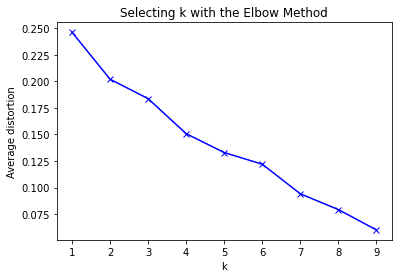

In [49]:
meanDistortions=[]
for k in range(1,10):
  model = KMeans(n_clusters=k)
  model.fit(data_df)
  prediction=model.predict(data_df)
  meanDistortions.append(sum(np.min(cdist(data_df, model.cluster_centers_, 'euclidean'), axis=1)) / data_df.shape[0])

clusters = range(1,10)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Here we choose Clusters to be 5

In [50]:
model.cluster_centers_

array([[-0.00942215, -0.00689502,  0.00371316, ...,  0.0080102 ,
         0.00121619, -0.00587507],
       [-0.01480956,  0.0093057 ,  0.02813237, ...,  0.01233716,
        -0.02889978,  0.01003971],
       [-0.02152112, -0.02438546,  0.03150908, ..., -0.00506233,
        -0.00557731, -0.03880004],
       ...,
       [-0.00942719, -0.00894018,  0.00160052, ..., -0.00524982,
        -0.00175917, -0.00411201],
       [-0.02413031, -0.0003211 ,  0.0446516 , ...,  0.04060508,
        -0.01453706, -0.00077644],
       [ 0.00447201, -0.00101916, -0.00295318, ..., -0.00088054,
         0.00193046, -0.00485868]])

In [51]:
kmeans = KMeans(n_clusters=5, n_init = 15, random_state=2345)
kmeans.fit(data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [52]:
kmeans.cluster_centers_

array([[ 0.01085373, -0.01301208, -0.01201124, ..., -0.0014422 ,
        -0.00694848, -0.00987148],
       [-0.01946994,  0.0044923 ,  0.03639199, ...,  0.02647112,
        -0.02171842,  0.00463163],
       [-0.00492122, -0.00541627,  0.01140025, ...,  0.02049916,
        -0.0094302 , -0.00692913],
       [-0.02152112, -0.02438546,  0.03150908, ..., -0.00506233,
        -0.00557731, -0.03880004],
       [-0.00795255, -0.00712525,  0.00269989, ...,  0.00624207,
         0.00089079, -0.00742794]])

In [53]:
## creating a new dataframe only for labels and converting it into categorical variable

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')
## creating a new dataframe only for Stocks and converting it into categorical variable

df_labels1 = pd.DataFrame(stocks , columns = list(['Stocks']))

df_labels1['Stocks'] = df_labels1['Stocks'].astype('category')
result = pd.concat([df_labels, df_labels1], axis=1, sort='labels')
result

,labels,Stocks
0,0,TCS.NS
1,4,RELIANCE.NS
2,4,TITAN.NS
3,1,BANKINDIA.NS
4,1,BANKINDIA.BO
5,0,TCS.BO
6,1,PNB.BO
7,1,PNB.NS
8,4,HDFCBANK.NS
9,4,HDFCBANK.BO


In [54]:
df_labeled = data_df.join(df_labels)

In [55]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis['Name' ] = stocks
df_analysis.loc[:,['labels','Name']]
# Below is Splitting Based on  %Change of closing Price

,labels,Name
0,0,TCS.NS
1,4,RELIANCE.NS
2,4,TITAN.NS
3,1,BANKINDIA.NS
4,1,BANKINDIA.BO
5,0,TCS.BO
6,1,PNB.BO
7,1,PNB.NS
8,4,HDFCBANK.NS
9,4,HDFCBANK.BO


# **3.Recommend which stocks should have what investments' allocation in %**

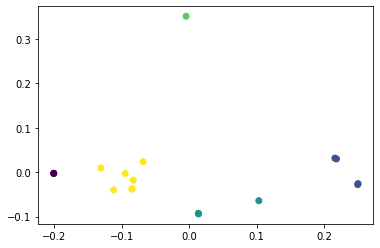

In [56]:
PCA_data = np.array(df_analysis)
PCA_data = PCA_data[:,:-2]
PCA_model = PCA(n_components=2)
PCA_model.fit(PCA_data)
center = PCA_model.transform(kmeans.cluster_centers_)
PCA_fit = PCA_model.transform(PCA_data)
plt.scatter(PCA_fit[:,0],PCA_fit[:,1],c = kmeans.labels_ )
plt.show()

In [57]:
data_df = pd.DataFrame()
for k in range(0,17):
    data_df[stocks[k]] = data_close[k*242:(k+1)*242]
data_df

,TCS.NS,RELIANCE.NS,TITAN.NS,BANKINDIA.NS,BANKINDIA.BO,TCS.BO,PNB.BO,PNB.NS,HDFCBANK.NS,HDFCBANK.BO,ICICIBANK.NS,ICICIBANK.BO,PEL.NS,CIPLA.NS,CADILAHC.NS,DRREDDY.NS,SBIN.NS
0,1902.800049,1121.000000,928.000000,106.349998,106.349998,1902.349976,79.750000,79.800003,1074.050049,1073.719971,363.750000,363.649994,2338.159912,523.049988,350.049988,2607.050049,299.600006
1,1923.300049,1106.400024,932.150024,104.800003,104.750000,1923.150024,77.849998,77.849998,1064.250000,1062.969971,364.600006,364.350006,2287.840088,514.549988,346.750000,2601.050049,293.899994
2,1899.949951,1092.750000,931.200012,105.750000,105.750000,1896.449951,77.800003,77.849998,1055.900024,1056.119995,363.250000,363.250000,2232.050049,512.400024,343.649994,2577.350098,291.100006
3,1876.849976,1098.650024,928.450012,108.699997,108.750000,1873.949951,81.300003,81.300003,1058.719971,1058.880005,365.200012,365.549988,2302.379883,512.799988,344.200012,2600.000000,297.649994
4,1897.900024,1104.750000,944.049988,106.400002,106.300003,1896.650024,80.500000,80.550003,1060.319946,1060.000000,367.700012,367.500000,2225.169922,514.049988,348.899994,2558.649902,296.299988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2215.600098,1546.449951,1204.099976,69.150002,69.099998,2215.050049,63.549999,63.500000,1289.150024,1289.300049,541.099976,541.049988,1609.030029,478.700012,258.450012,2895.949951,331.450012
238,2201.949951,1515.400024,1192.500000,70.949997,70.900002,2201.050049,62.799999,62.799999,1270.449951,1271.550049,538.750000,539.000000,1602.050049,474.149994,257.149994,2865.600098,329.850006
239,2198.500000,1542.349976,1191.449951,71.800003,71.800003,2198.149902,65.349998,65.349998,1275.000000,1274.900024,549.400024,549.400024,1593.939941,481.100006,255.800003,2897.600098,337.250000
240,2183.199951,1544.199951,1193.750000,69.750000,69.699997,2182.899902,64.400002,64.400002,1282.150024,1280.849976,543.950012,543.950012,1585.050049,479.950012,255.350006,2888.850098,334.399994


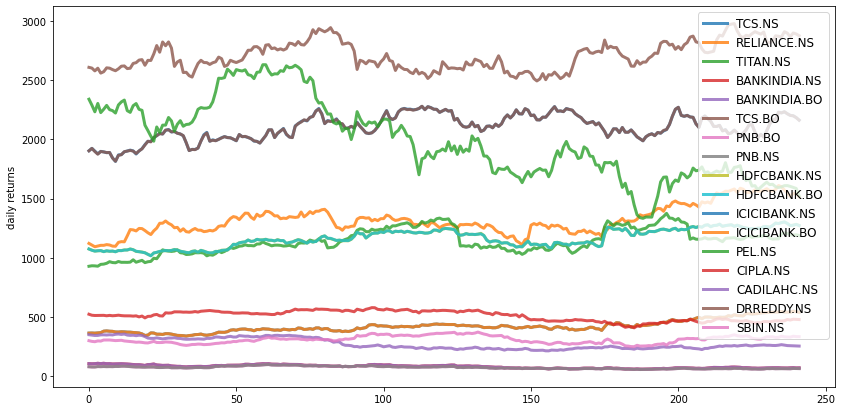

In [58]:
plt.figure(figsize=(14, 7))
for c in data_df.columns.values:
    plt.plot(data_df.index, data_df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.show()

In [59]:
table = data_df
table.drop(['TCS.NS','BANKINDIA.BO','TCS.BO','PNB.BO','HDFCBANK.BO','ICICIBANK.BO','PNB.BO','PNB.NS'],inplace = True,axis = 1)#Dropped Duplicates


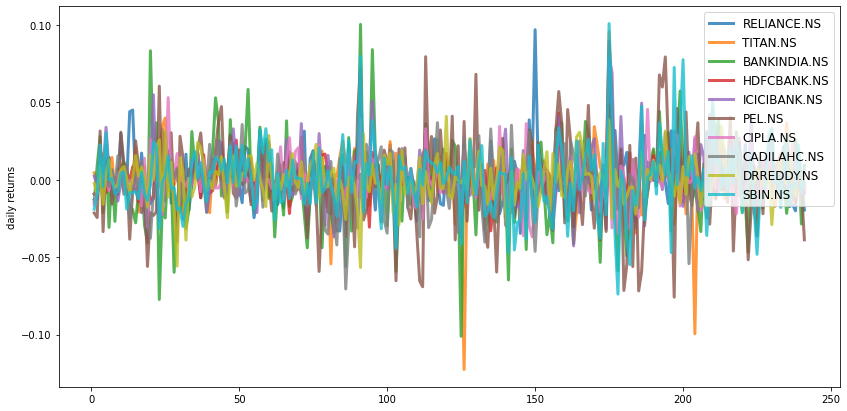

In [60]:
returns = table.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')
plt.show()

In [61]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *242
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(242)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")    
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    plt.show()
    # print(max_sharpe_allocation)
    return max_sharpe_allocation,min_vol_allocation

def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    # print(max_sharpe_allocation)
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(242)
    an_rt = mean_returns * 242
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)
    plt.show()
    return an_rt,an_vol

In [62]:
returns = table.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 250000
risk_free_rate = 0.0515

In [ ]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

In [ ]:
import seaborn as sns
import scipy.optimize as sco
max_allocation, min_allocation = display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

# **Following are 2 Possible Allocation**

In [ ]:
max_allocation #High Returns

In [ ]:
min_allocation #Low Risk

Note Above Allocation are based on Percentages